In [1]:
from random import randint
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from tqdm import tqdm

In [2]:
# tracking snakes and ladders endpoints
snaders = list(range(0,101))
snaders[1] = 38
snaders[4] = 14
snaders[9] = 31
snaders[16] = 6
snaders[21] = 42
snaders[28] = 84
snaders[36] = 44
snaders[48] = 26
snaders[49] = 11
snaders[51] = 67
snaders[56] = 53
snaders[62] = 19
snaders[64] = 60
snaders[71] = 91
snaders[80] = 100
snaders[87] = 24
snaders[93] = 73
snaders[95] = 75
snaders[98] = 78

In [3]:
def gameLength(exactWin = True):
    turns = 0
    player = 0
    while (player < 100):
        turns += 1
        dice = randint(1,6)
        player += dice
        # condition for winning
        if player > 100:
            if exactWin:
                player = 100-player+100 # roll exact to win
            else:
                player = 100 # roll at least to win
        player = snaders[player]
    return turns

In [23]:
def runSims(n=1000,exactWin=True):
    lengths = []
    for i in tqdm(range(0,n)):
        lengths.append(gameLength(exactWin))
    return lengths

In [36]:
exact = runSims(100000,True)
len(exact)

100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [00:05<00:00, 19564.67it/s]


100000

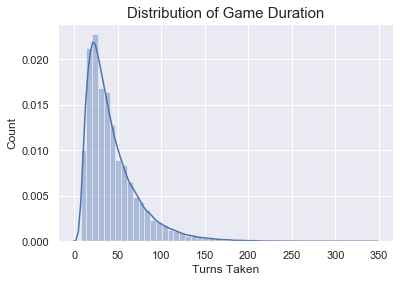

In [37]:
dist = sns.distplot(exact)
dist.set_title('Distribution of Game Duration',size=15)
dist.set_xlabel('Turns Taken')
dist.set_ylabel('Count')
plt.show()

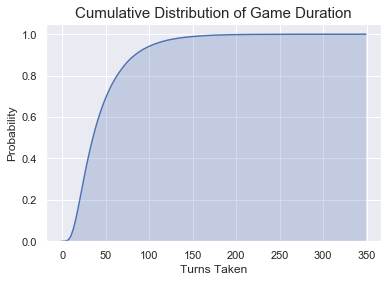

In [38]:
cumu = sns.kdeplot(exact,cumulative=True,shade=True)
cumu.set_title('Cumulative Distribution of Game Duration',size=15)
cumu.set_xlabel('Turns Taken')
cumu.set_ylabel('Probability')
plt.show()

In [39]:
sum(exact)/len(exact)

43.7471

In [41]:
atLeast = runSims(100000,False)
len(atLeast)

100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [00:04<00:00, 22682.95it/s]


100000

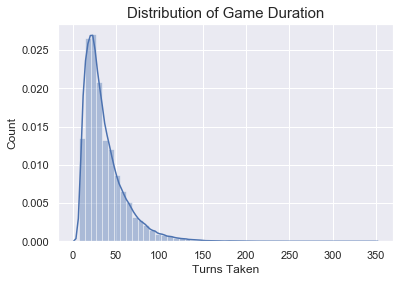

In [43]:
dist = sns.distplot(atLeast)
dist.set_title('Distribution of Game Duration',size=15)
dist.set_xlabel('Turns Taken')
dist.set_ylabel('Count')
plt.show()

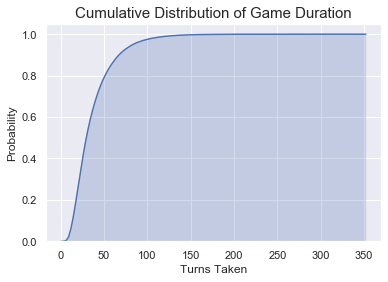

In [44]:
cumu = sns.kdeplot(atLeast,cumulative=True,shade=True)
cumu.set_title('Cumulative Distribution of Game Duration',size=15)
cumu.set_xlabel('Turns Taken')
cumu.set_ylabel('Probability')
plt.show()

In [42]:
sum(atLeast)/len(atLeast)

36.2242